# Kaggle 신용카드 사기 검출
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-03-29 02:31:52--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   271MB/s    in 0.2s    

2023-03-29 02:31:52 (271 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [ ]:
!ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Mar 29 02:31 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Mar 27 13:41 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [ ]:
!unzip /content/creditCardFraud.zip

Archive:  /content/creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [ ]:
!ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Mar 29 02:31 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Mar 27 13:41 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [ ]:
import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* 0 (정상) Class와 1 (사기) Class 개수

In [ ]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* 0 (정상) Class와 1 (사기) Class 비율

In [ ]:
DF.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

> ## 3) 'Time' -> 'hours'

* 'Time': 각 거래와 첫 번째 거래 사이에 경과된 초('Seconds') 

> ### (1) 시간('hours') 정보 생성

In [ ]:
timedelta = pd.to_timedelta(DF['Time'], unit = 's')

DF['Time'] = (timedelta.dt.components.hours).astype(int)

In [ ]:
DF.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


> ## 4) train_test_split( )

* X (Input), y (Output) 지정

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 30), (284807,))

* With 'Stratify'

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045,
                                                    stratify = y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [ ]:
print('Train_Data :','\n', y_train.value_counts(normalize = True))
print()
print('Test_Data :','\n', y_test.value_counts(normalize = True))

Train_Data : 
 0    0.998275
1    0.001725
Name: Class, dtype: float64

Test_Data : 
 0    0.998268
1    0.001732
Name: Class, dtype: float64


# I. Keras Modeling

> ## 1) 모델 생성

- 모델 신경망 구조 정의

In [84]:
from tensorflow.keras import models
from tensorflow.keras import layers

ccfd = models.Sequential()
ccfd.add(layers.Dense(128, activation = 'relu', input_shape = (30,)))
ccfd.add(layers.Dense(64, activation = 'relu'))
ccfd.add(layers.Dense(32, activation = 'relu'))
ccfd.add(layers.Dense(1, activation = 'sigmoid'))

- 모델 구조 확인

In [85]:
ccfd.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               3968      
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


- 모델 레이어 시각화

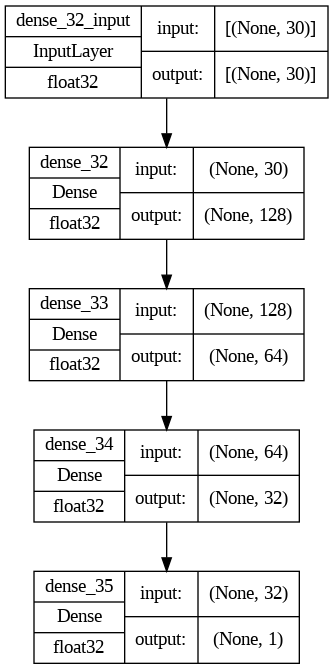

In [86]:
from tensorflow.keras import utils

utils.plot_model(ccfd,
                 show_shapes = True,
                 show_dtype = True)

> ## 3) Model Compile

- 모델 학습방법 설정

In [87]:
ccfd.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['Recall'])

> ## 4) Model Fit

- 모델 학습 수행

In [88]:
%%time

Hist_ccfd = ccfd.fit(X_train, y_train,
                     epochs = 50,
                     batch_size = 1024,
                     validation_data = (X_test, y_test))

Epoch 1/50
195/195 [==============================] - 4s 15ms/step - loss: 0.1187 - recall: 0.4041 - val_loss: 0.0076 - val_recall: 0.6554
Epoch 2/50
195/195 [==============================] - 2s 10ms/step - loss: 0.0240 - recall: 0.6192 - val_loss: 0.0055 - val_recall: 0.8311
Epoch 3/50
195/195 [==============================] - 2s 9ms/step - loss: 0.0106 - recall: 0.7209 - val_loss: 0.0048 - val_recall: 0.7432
Epoch 4/50
195/195 [==============================] - 2s 11ms/step - loss: 0.0062 - recall: 0.7297 - val_loss: 0.0037 - val_recall: 0.8378
Epoch 5/50
195/195 [==============================] - 3s 13ms/step - loss: 0.0040 - recall: 0.7616 - val_loss: 0.0032 - val_recall: 0.8514
Epoch 6/50
195/195 [==============================] - 2s 9ms/step - loss: 0.0055 - recall: 0.7384 - val_loss: 0.0031 - val_recall: 0.7703
Epoch 7/50
195/195 [==============================] - 4s 18ms/step - loss: 0.0228 - recall: 0.6948 - val_loss: 0.0034 - val_recall: 0.8108
Epoch 8/50
195/195 [=========

> ## 5) 학습 결과 시각화

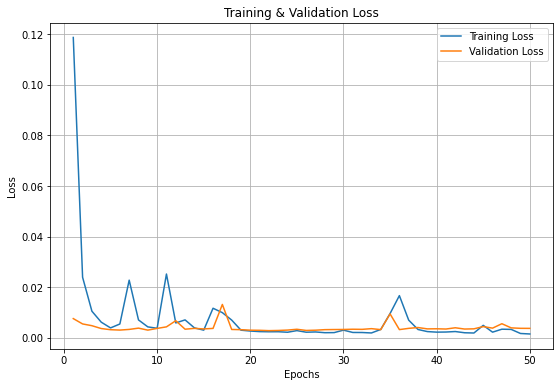

In [89]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['loss'])
plt.plot(epochs, Hist_ccfd.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

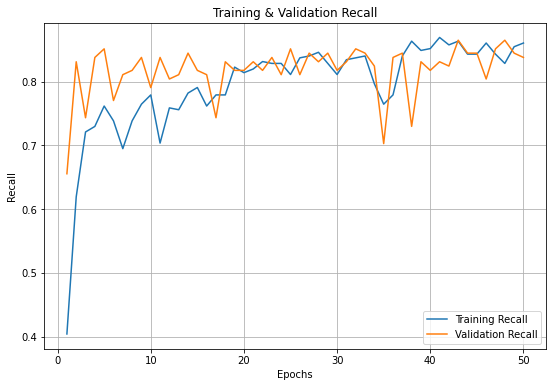

In [90]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['recall']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['recall'])
plt.plot(epochs, Hist_ccfd.history['val_recall'])
plt.title('Training & Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

- Loss & Accuracy

In [94]:
loss, recall = ccfd.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Recall = {:.5f}'.format(recall))

Loss = 0.00377
Recall = 0.83784


In [95]:
import numpy as np

y_hat = np.round(ccfd.predict(X_test, verbose = 0))

y_hat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

> ## 7) Model Predict

- Probability

In [96]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  124,    24],
       [   11, 85284]])

- Probability to Class

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99972   0.99987   0.99979     85295
          부정    0.91852   0.83784   0.87633       148

    accuracy                        0.99959     85443
   macro avg    0.95912   0.91885   0.93806     85443
weighted avg    0.99958   0.99959   0.99958     85443



# 1) SMOTE

- Before SMOTE

In [98]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [99]:
pd.Series(y_train).value_counts()

0    199020
1       344
Name: Class, dtype: int64

- imbalanced-learn Package

In [100]:
from imblearn.over_sampling import SMOTE 

After SMOTE

In [101]:
OS = SMOTE(random_state = 2045)

X_train_OS, y_train_OS = OS.fit_resample(X_train, y_train)



In [102]:
X_train_OS.shape, y_train_OS.shape

((398040, 30), (398040,))

0 (정상) Class와 1 (사기) Class 개수

In [103]:
pd.Series(y_train_OS).value_counts()

0    199020
1    199020
Name: Class, dtype: int64

> ## 2) Model Define

- 모델 신경망 구조 정의

In [104]:
from tensorflow.keras import models
from tensorflow.keras import layers

ccfd_OS = models.Sequential()
ccfd_OS.add(layers.Dense(256, activation = 'relu', input_shape = (30,)))
ccfd_OS.add(layers.Dense(128, activation = 'relu'))
ccfd_OS.add(layers.Dense(64, activation = 'relu'))
ccfd_OS.add(layers.Dense(32, activation = 'relu'))
ccfd_OS.add(layers.Dense(1, activation = 'sigmoid'))

- 모델 구조 확인

In [105]:
ccfd_OS.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               7936      
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

- 모델 학습방법 설정

In [106]:
ccfd_OS.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['Recall'])

> ## 4) Model Fit

- 약 2분

In [107]:
%%time

Hist_ccfd = ccfd_OS.fit(X_train_OS, y_train_OS,
                        epochs = 15,
                        batch_size = 2048,
                        validation_data = (X_test, y_test))

Epoch 1/15
195/195 [==============================] - 12s 37ms/step - loss: 0.1363 - recall: 0.9454 - val_loss: 0.2599 - val_recall: 0.9122
Epoch 2/15
195/195 [==============================] - 4s 23ms/step - loss: 0.0414 - recall: 0.9867 - val_loss: 0.0171 - val_recall: 0.8851
Epoch 3/15
195/195 [==============================] - 6s 32ms/step - loss: 0.0166 - recall: 0.9943 - val_loss: 0.0133 - val_recall: 0.8784
Epoch 4/15
195/195 [==============================] - 5s 28ms/step - loss: 0.0177 - recall: 0.9949 - val_loss: 0.0263 - val_recall: 0.8851
Epoch 5/15
195/195 [==============================] - 9s 45ms/step - loss: 0.0100 - recall: 0.9976 - val_loss: 0.0087 - val_recall: 0.8581
Epoch 6/15
195/195 [==============================] - 6s 32ms/step - loss: 0.0060 - recall: 0.9990 - val_loss: 0.0075 - val_recall: 0.8649
Epoch 7/15
195/195 [==============================] - 5s 28ms/step - loss: 0.0071 - recall: 0.9985 - val_loss: 0.0098 - val_recall: 0.8784
Epoch 8/15
195/195 [======

> ## 5) 학습 결과 시각화

- Loss Visualization

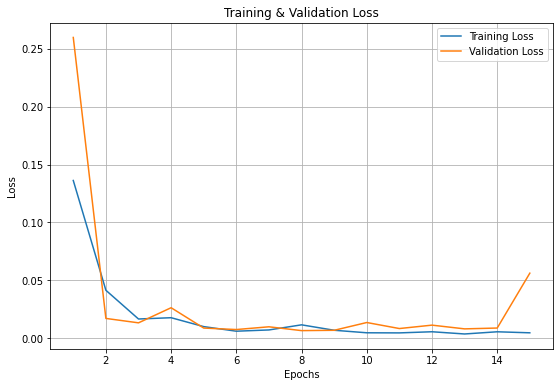

In [108]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['loss'])
plt.plot(epochs, Hist_ccfd.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

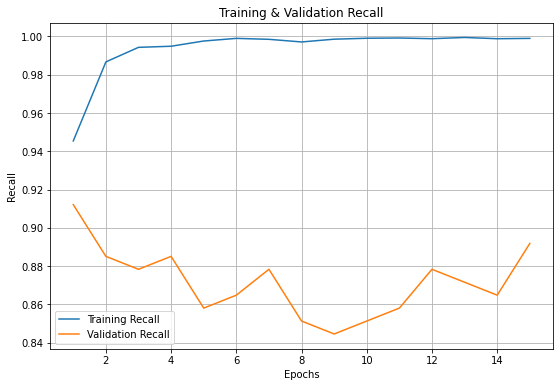

In [109]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_ccfd.history['recall']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_ccfd.history['recall'])
plt.plot(epochs, Hist_ccfd.history['val_recall'])
plt.title('Training & Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Training Recall', 'Validation Recall'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

- Loss & Accuracy

In [110]:
loss, recall = ccfd_OS.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Recall = {:.5f}'.format(recall))

Loss = 0.05619
Recall = 0.89189


> ## 7) Model Predict

- .predict( )

In [111]:
import numpy as np

y_hat = np.round(ccfd_OS.predict(X_test, verbose = 0))

y_hat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [112]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  132,    16],
       [ 1378, 83917]])

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99981   0.98384   0.99176     85295
          부정    0.08742   0.89189   0.15923       148

    accuracy                        0.98369     85443
   macro avg    0.54361   0.93787   0.57550     85443
weighted avg    0.99823   0.98369   0.99032     85443



# 
# 
# 
# The End
# 
# 
# 